<a href="https://colab.research.google.com/github/Masterak25/ML_AK/blob/main/Sentimental_Analysis_NB_VS_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import files
uploaded = files.upload()

Saving Sentiment.csv to Sentiment.csv


# Importing Libraries

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data using Pandas

In [147]:
df=pd.read_csv("Sentiment.csv")
df

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,SantoliDonato,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,mhfa16hq,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,DrottM,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,danijeantheq,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [148]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [150]:
from sklearn.preprocessing import LabelEncoder

In [151]:
LE=LabelEncoder()

In [152]:
for i in df:
    df[i] = LE.fit_transform(df[i].astype(str).values)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   id                         13871 non-null  int64
 1   candidate                  13871 non-null  int64
 2   candidate_confidence       13871 non-null  int64
 3   relevant_yn                13871 non-null  int64
 4   relevant_yn_confidence     13871 non-null  int64
 5   sentiment                  13871 non-null  int64
 6   sentiment_confidence       13871 non-null  int64
 7   subject_matter             13871 non-null  int64
 8   subject_matter_confidence  13871 non-null  int64
 9   candidate_gold             13871 non-null  int64
 10  name                       13871 non-null  int64
 11  relevant_yn_gold           13871 non-null  int64
 12  retweet_count              13871 non-null  int64
 13  sentiment_gold             13871 non-null  int64
 14  subject_matter_gold   

In [154]:
df.isnull().sum()

id                           0
candidate                    0
candidate_confidence         0
relevant_yn                  0
relevant_yn_confidence       0
sentiment                    0
sentiment_confidence         0
subject_matter               0
subject_matter_confidence    0
candidate_gold               0
name                         0
relevant_yn_gold             0
retweet_count                0
sentiment_gold               0
subject_matter_gold          0
text                         0
tweet_coord                  0
tweet_created                0
tweet_id                     0
tweet_location               0
user_timezone                0
dtype: int64

# visualization

In [155]:
 from collections import Counter

In [156]:
Counter(" sentiment")

Counter({' ': 1, 'e': 2, 'i': 1, 'm': 1, 'n': 2, 's': 1, 't': 2})

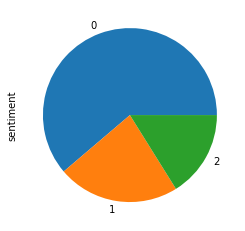

In [157]:
df['sentiment'].value_counts().plot(kind='pie')

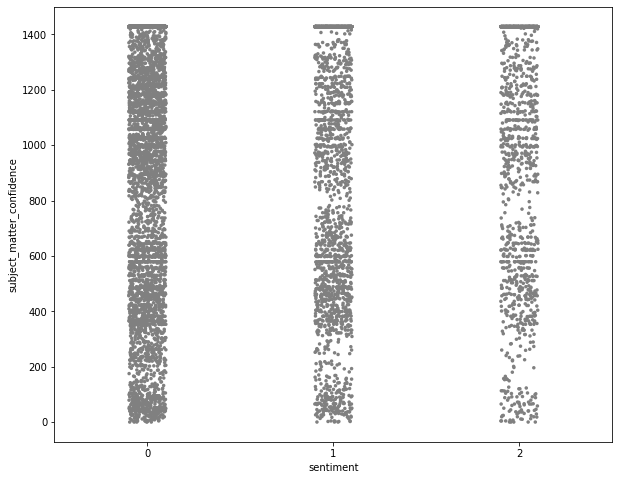

In [158]:
plt.figure(figsize=(10,8))
sns.stripplot(x="sentiment", y="subject_matter_confidence", data=df,
              size=3.5, color=".50", linewidth=0)

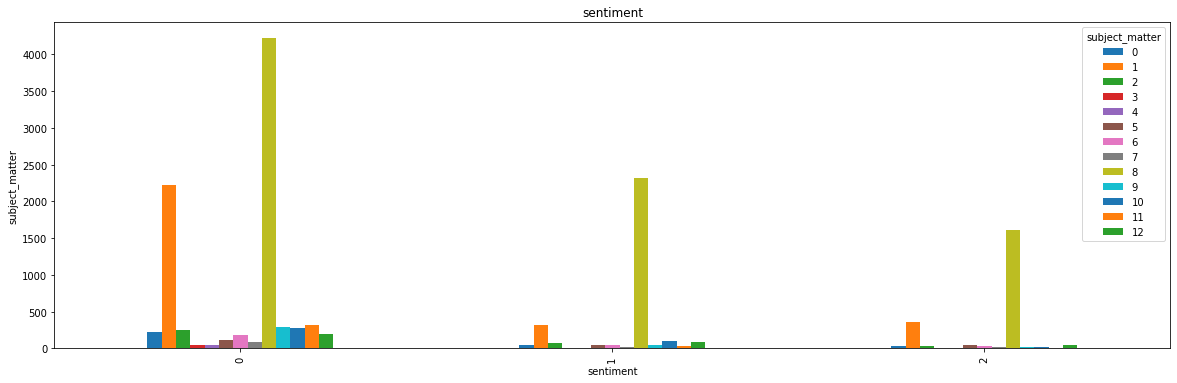

In [159]:
pd.crosstab(df.sentiment,df.subject_matter).plot(kind="bar",figsize=(20,6))
plt.title('sentiment')
plt.xlabel('sentiment')
plt.ylabel('subject_matter')
plt.show()

# Total number of positive and negative sentiments

In [160]:
review_df = df[df['sentiment'] != 'neutral']

In [161]:
print(review_df.shape)
review_df.head(5)


(13871, 21)


,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,0,7,985,0,507,1,674,8,1428,9,1960,0,356,4,10,5898,20,8725,13814,4009,89
1,4983,9,985,0,507,2,467,8,1428,9,3649,0,192,4,10,6307,20,8725,13813,4009,110
2,6094,7,985,0,507,1,722,8,1058,9,3768,0,201,4,10,6485,20,8725,13812,4009,110
3,7205,7,985,0,507,2,1152,8,1359,9,3037,0,62,4,10,6225,20,8724,13811,3250,38
4,8316,2,985,0,507,2,1071,8,1428,9,8981,0,88,4,10,4936,20,8724,13810,4009,12


In [162]:
review_df["sentiment"].value_counts()

0    8493
1    3142
2    2236
Name: sentiment, dtype: int64

# Splitting and Normalizing the data

In [163]:
x_ind=df.drop("sentiment",axis=1)

In [164]:
y_dep=df.sentiment

In [165]:
y_dep=LE.fit_transform(y_dep)
y_dep

array([1, 2, 1, ..., 2, 0, 2])

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_ind=sc.fit_transform(x_ind)

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)

# Building the model

In [168]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [169]:
model=Sequential()

In [170]:
#first hidden layer
model.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=20))
#second hidden layer
model.add(Dense(units=60,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

# Summary of the Model

In [171]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_13 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 61        
Total params: 8,221
Trainable params: 8,221
Non-trainable params: 0
_________________________________________________________________


# Optimizing the data

In [172]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [173]:
 model.fit(x_train,y_train,epochs = 100,batch_size=100)

Epoch 1/100
111/111 [==============================] - 1s 2ms/step - loss: 0.6371 - accuracy: 0.4548
Epoch 2/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.4839
Epoch 3/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.4915
Epoch 4/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.4950
Epoch 5/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.5009
Epoch 6/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.5001
Epoch 7/100
111/111 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.5081
Epoch 8/100
111/111 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.5018
Epoch 9/100
111/111 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.5101
Epoch 10/100
111/111 [==============================] - 0s 2ms/step - loss: 0.4388 - accura

# Prediction

In [174]:
y_pred=model.predict(x_test)

In [175]:
y_pred=(y_pred>0.5)

In [176]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [177]:
cnf=confusion_matrix(y_test,y_pred)

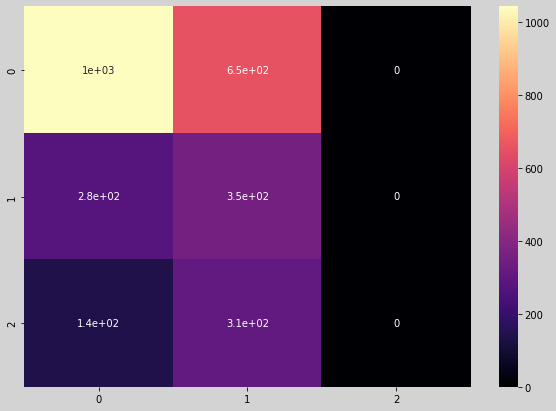

In [178]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='magma');
plt.show()

In [179]:
a=accuracy_score(y_pred,y_test) *100
a

50.34234234234234

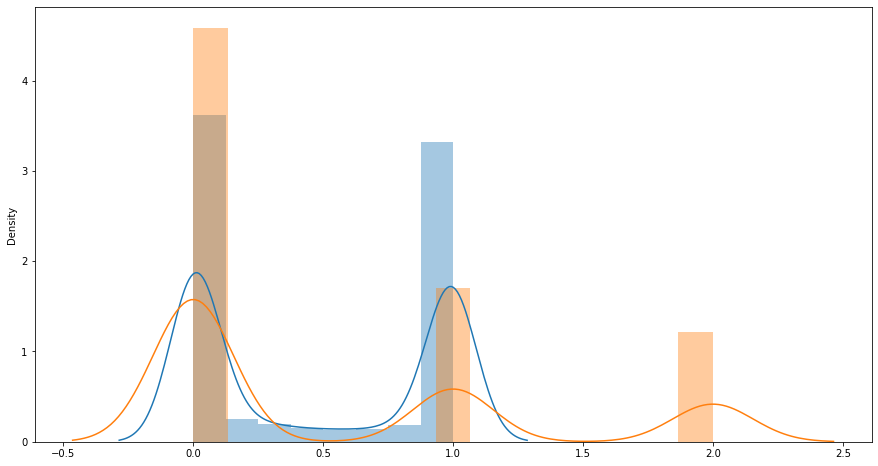

In [180]:
 plt.figure(figsize=(15,8))
sns.distplot(model.predict(x_test));
sns.distplot(y_test);
plt.show()

In [181]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

87/87 [==============================] - 0s 1ms/step - loss: -5.4385 - accuracy: 0.5034
Test loss: -5.438458442687988
Test accuracy: 0.5034234523773193


# SENTIMENTAL ANALYSIS USING NAIVE BAYES CLASSIFIER

In [200]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [201]:
fig = px.histogram(df, x="sentiment")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Analyzing Different Sentiments')
fig.show()

In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer

In [203]:
data = df[['text','sentiment']]

In [204]:
data

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [205]:
def preprocess_data(data):
    # Convert text to lowercase
    data['text'] = data['text'].str.strip().str.lower()
    return data

In [206]:
data = preprocess_data(data)

Splitting Data

In [207]:
# Split into training and testing data
x = data['text']
y = data['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.2, random_state=10)

In [208]:
x_train.shape

(11096,)

Vectorize text reviews to numbers.



In [209]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x_train= vec.fit_transform(x_train).toarray()
x_test = vec.transform(x_test).toarray()

Model Generation using NAIVE BAYES 

In [210]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
y_pred1=model.fit(x_train, y_train).predict(x_test)

In [211]:
y_pred1

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Neutral',
       'Neutral'], dtype='<U8')

In [212]:
b=model.score(x_test, y_test) *100
b

69.36936936936937

In [213]:
model.predict(vec.transform(['Love this app simply awesome!']))

array(['Positive'], dtype='<U8')

In [214]:
model.predict(vec.transform(['he is a terrible leader']))

array(['Negative'], dtype='<U8')

In [215]:
model.predict(vec.transform(['today is monday']))

array(['Neutral'], dtype='<U8')

# COMPARATIVE STUDIES 

In [218]:
data = {'accuracy':[a,b]}
df1 = pd.DataFrame(data)
df1 = pd.DataFrame(data, index=['ANN','naive-bayes'])
df1.index.rename('ML models', inplace=True)
df1


,accuracy
ML models,
ANN,50.342342
naive-bayes,69.369369


# FROM ABOVE TABLE WE CAN CLEARLY SEE THAT NAIVE BAYES OUTPERFORMS ANN IN SENTIMENTAL ANALYSIS 